In [1]:
set.seed(11)
rbinom(2500, 1, 0.5) -> ipp 
df <- data.frame(
sex=factor(rep(c("A", "B"), each=2500)), weight=round(c(rnorm(2500, mean=55, sd=5),
ipp* rnorm(2500, mean=65, sd=5)                                                     + (1-ipp)*rnorm(2500, mean=45, sd=3) ) ))
head(df) ; tail(df)

,sex,weight
,<fct>,<dbl>
1,A,56
2,A,64
3,A,57
4,A,48
5,A,55
6,A,57


,sex,weight
,<fct>,<dbl>
4995,B,65
4996,B,45
4997,B,68
4998,B,66
4999,B,47
5000,B,63


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


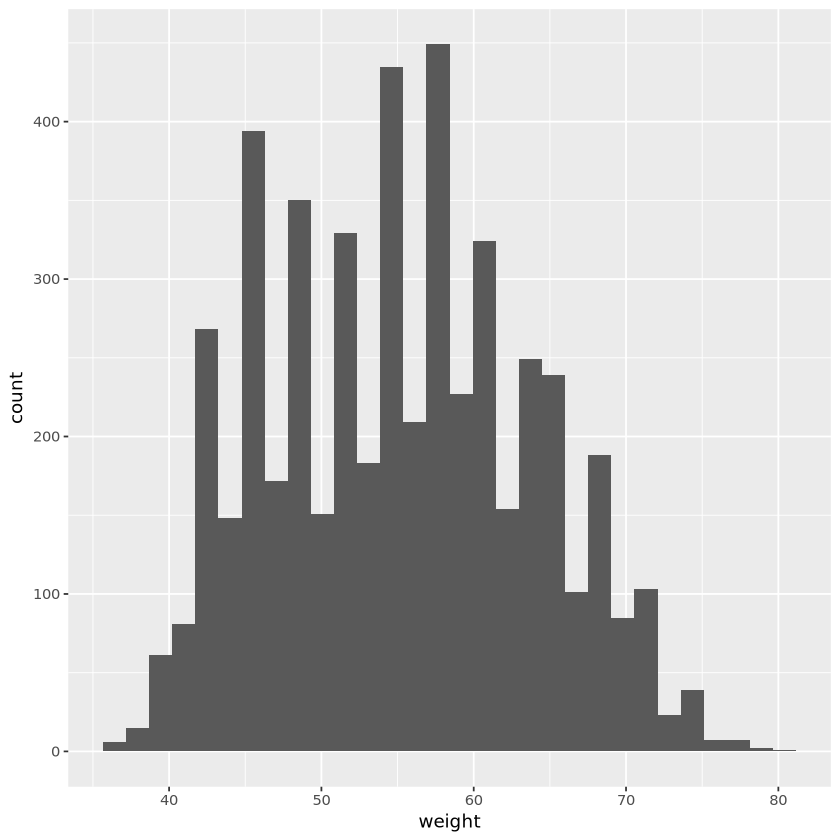

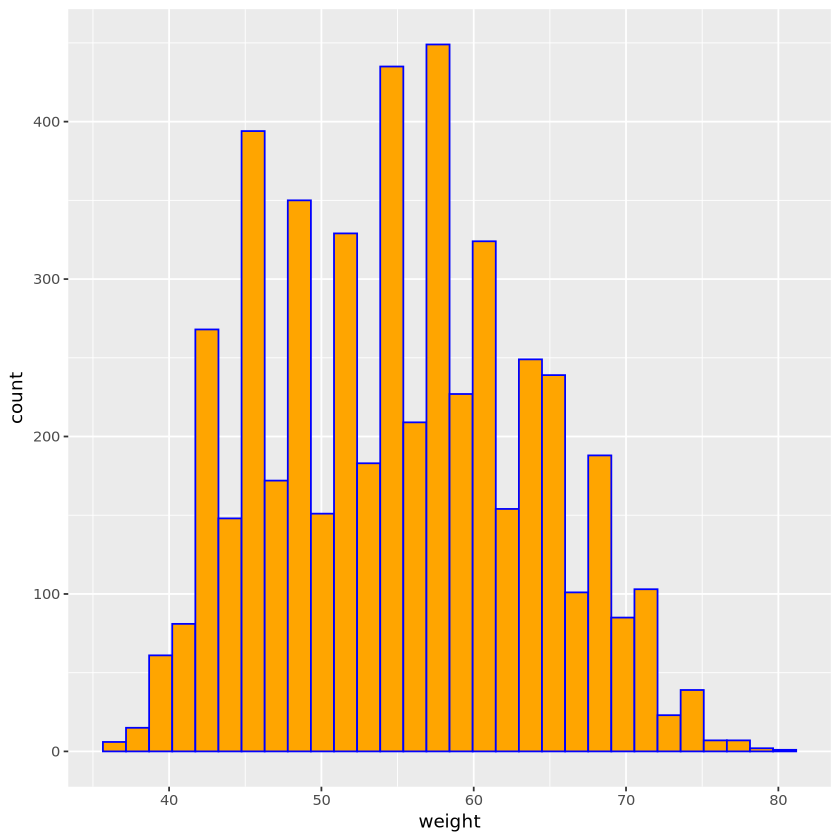

In [2]:
library(ggplot2)
ggplot(df, aes(x=weight)) + geom_histogram()
library(ggplot2)
ggplot(df, aes(x=weight)) + geom_histogram() + geom_histogram(color='blue', fill='orange')


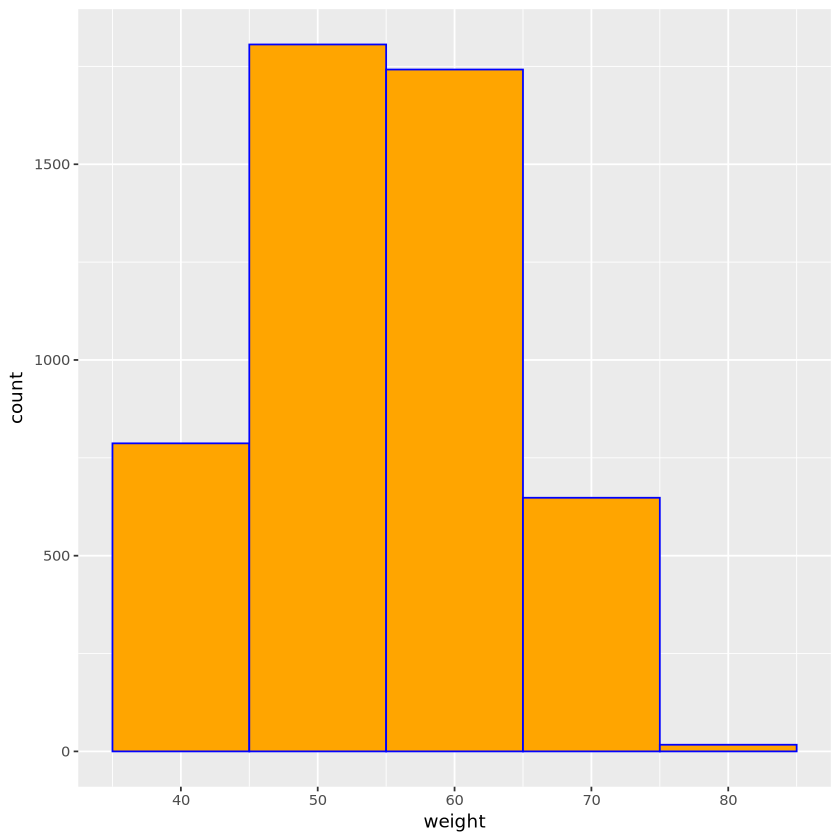

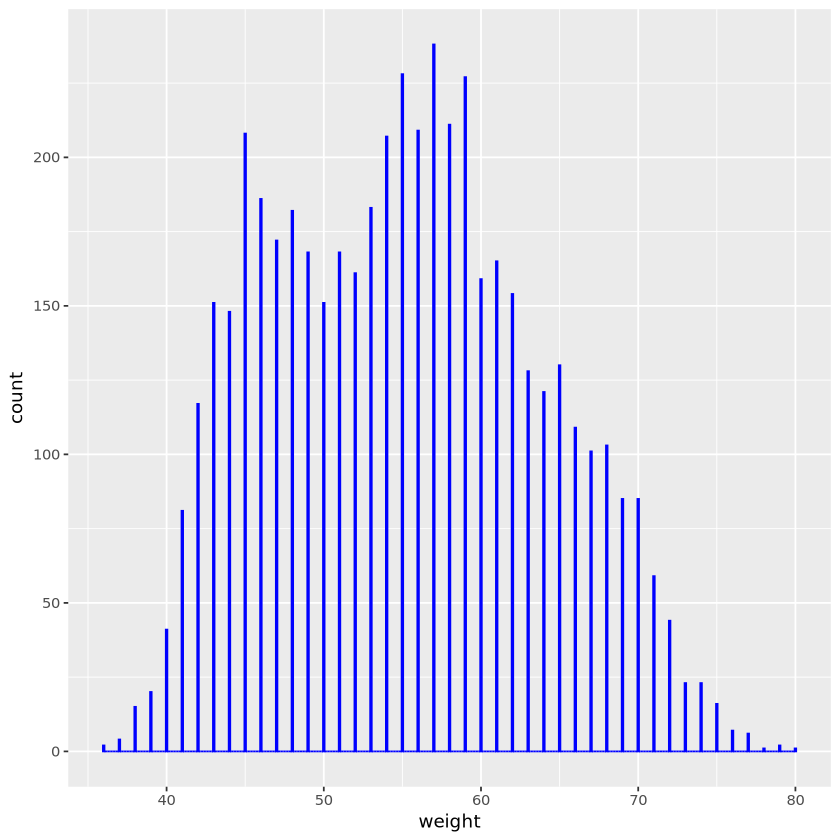

In [3]:
library(ggplot2)
ggplot(df, aes(x=weight)) + geom_histogram(binwidth=10, color="blue", fill="orange")
library(ggplot2)
ggplot(df, aes(x=weight)) + geom_histogram(binwidth=0.1, color="blue", fill="orange")


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


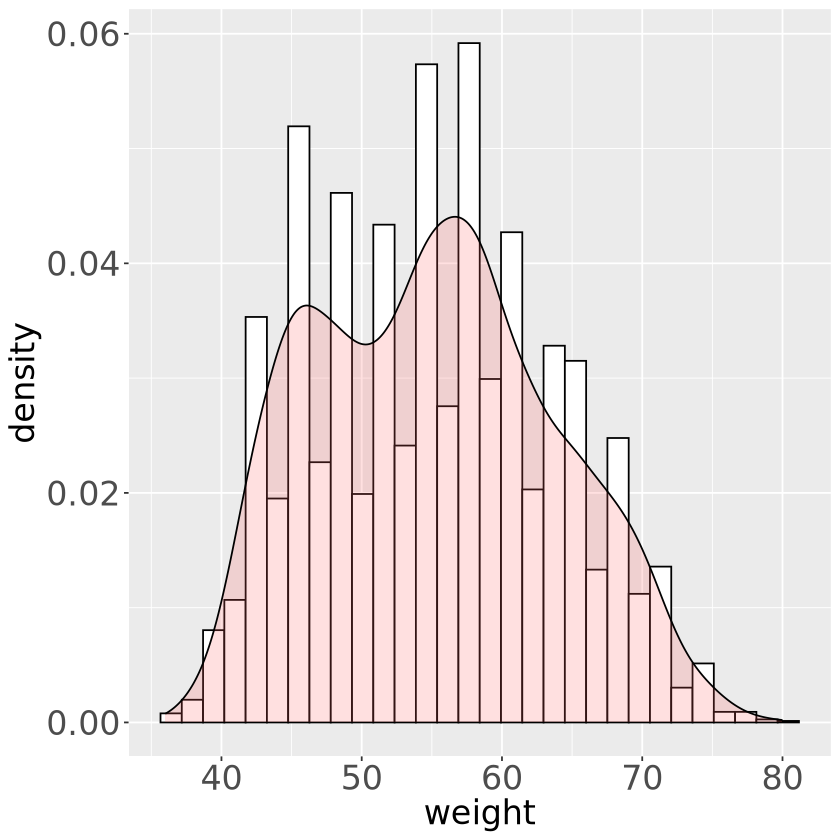

In [4]:
ggplot(df, aes(x=weight)) + geom_histogram(aes(y=..density..), 
  colour="black", fill="white")+ geom_density(alpha=.2, fill="#FF6666") + 
  # geom_histogram(position="dodge")+ 
  theme(legend.position="top") + theme(axis.title = element_text(size=20),
  legend.title = element_text(size=20), 
  legend.text = element_text(size=20), axis.text = element_text(size=20))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


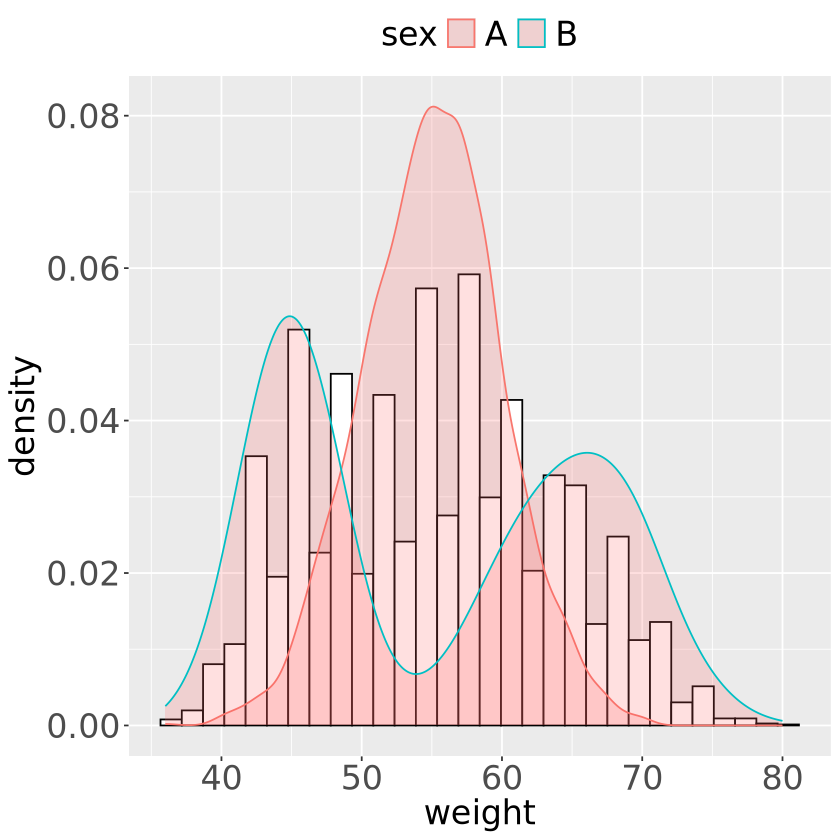

In [5]:
ggplot(df, aes(x=weight, color=sex, fill=sex)) + 
  geom_histogram(aes(y=..density..), colour="black", fill="white")+ 
  geom_density(alpha= 0.2, fill="#FF6666") +
  theme(legend.position="top") + 
  theme(axis.title = element_text(size=20), legend.title = element_text(size=20),
  legend.text = element_text(size=20), axis.text = element_text(size=20))

,decrease,rowpos,colpos,treatment
,<dbl>,<dbl>,<dbl>,<fct>
1,57,1,1,D
2,95,2,1,E
3,8,3,1,B
4,69,4,1,H
5,92,5,1,G
6,90,6,1,F


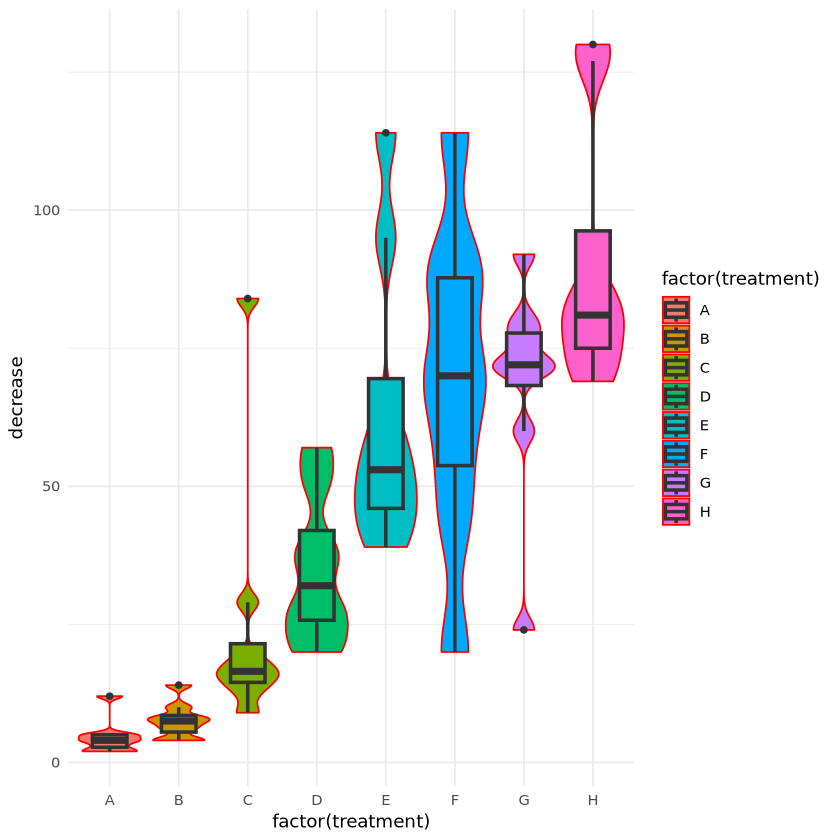

In [6]:
head(OrchardSprays)
ggplot(OrchardSprays, aes(x=factor(treatment), y=decrease, fill=factor(treatment)))+
  geom_violin(adjust=0.5, scale='width', color = rainbow(1))+
  geom_boxplot(size=1, width=0.5)+ theme_minimal()

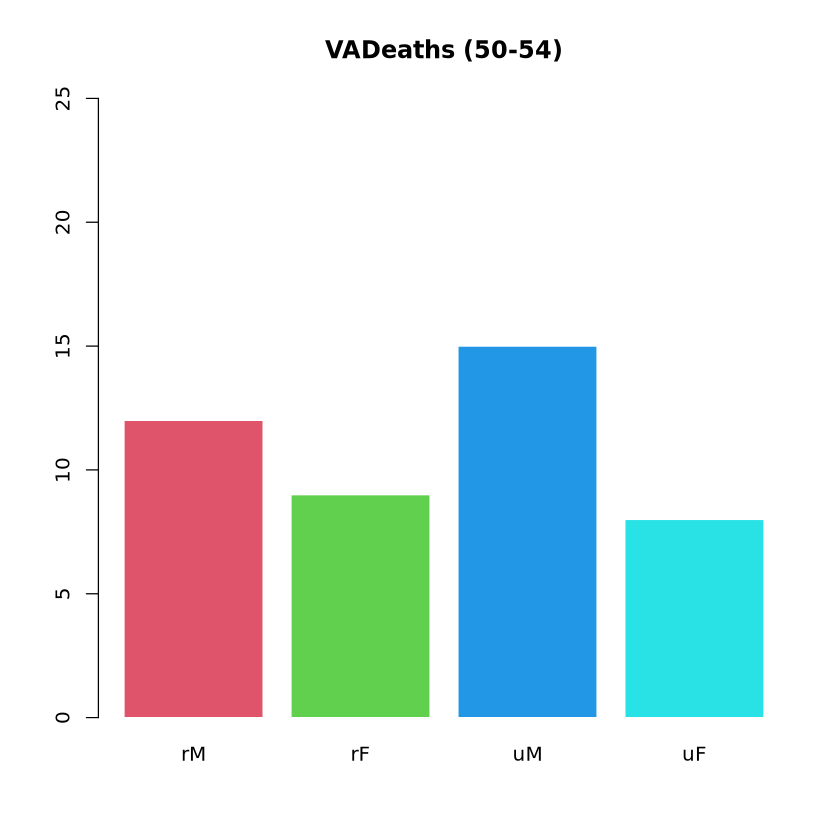

In [7]:
data(VADeaths) 
# par(mfrow=c(1,1))
colnames(VADeaths) = c('rM','rF','uM','uF') 
barplot(round(VADeaths[1,]), col=2:5, border='white', ylim=c(0,25), main= 'VADeaths (50-54)')

 'table' num [1:2, 1:2, 1:6] 512 313 89 19 353 207 17 8 120 205 ...
 - attr(*, "dimnames")=List of 3
  ..$ Admit : chr [1:2] "Admitted" "Rejected"
  ..$ Gender: chr [1:2] "Male" "Female"
  ..$ Dept  : chr [1:6] "A" "B" "C" "D" ...


,Admitted,Rejected,Sum
Male,1198,1493,2691
Female,557,1278,1835
Sum,1755,2771,4526


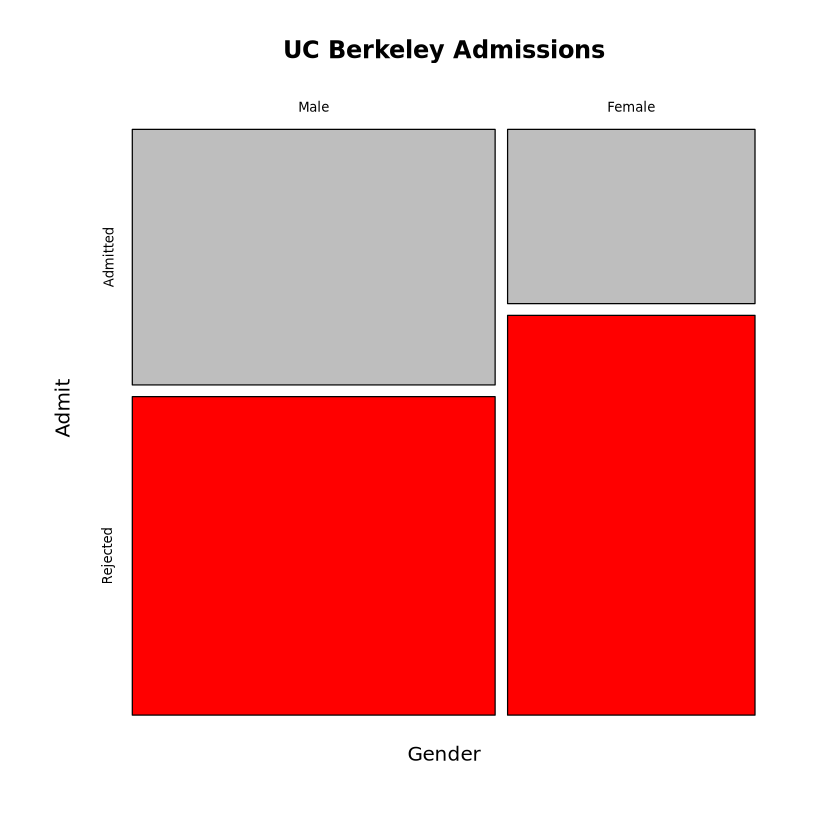

In [8]:
require(ggplot2) ; data(UCBAdmissions) ; 
str(UCBAdmissions) 
addmargins(apply(UCBAdmissions, c(2,1), sum))
require(graphics) 
mosaicplot(apply(UCBAdmissions, c(2,1), sum),
           color=c('gray','red'), main ='UC Berkeley Admissions' )


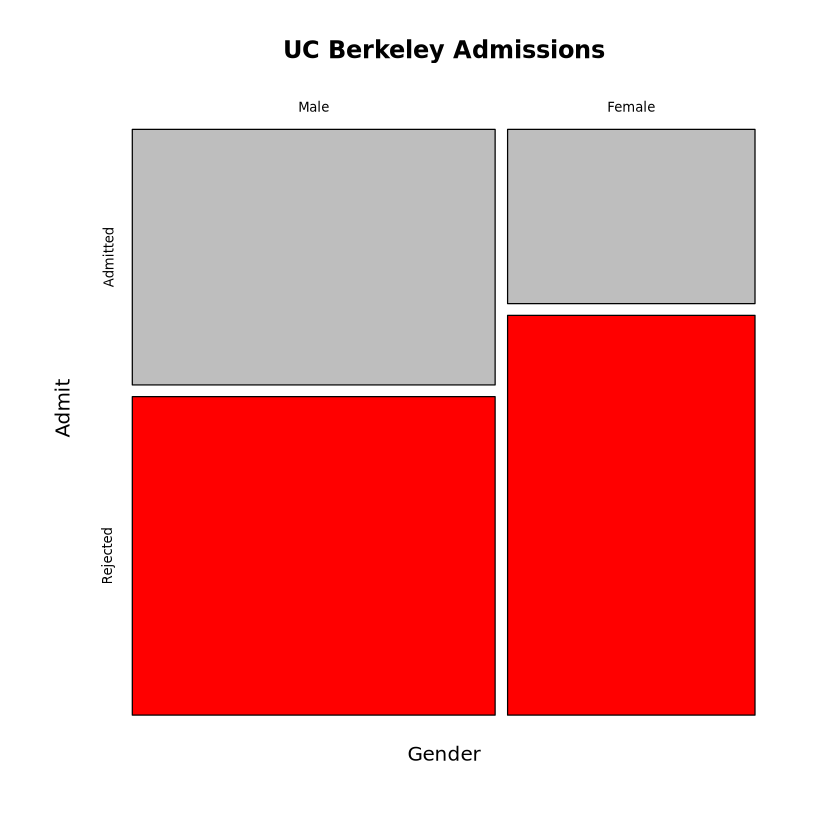

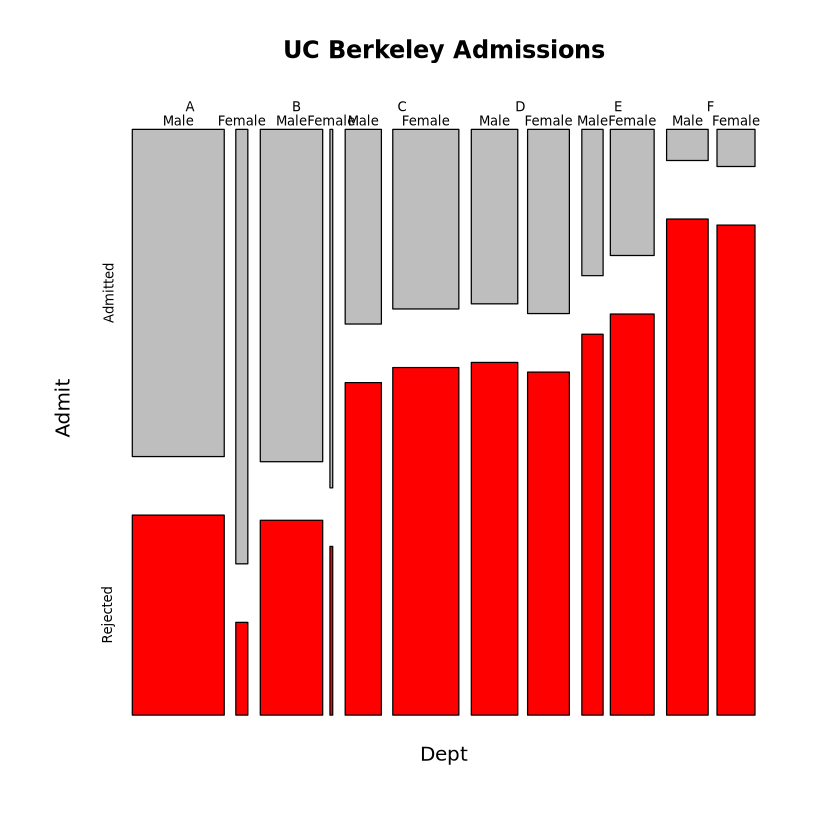

In [9]:
require(graphics) 
mosaicplot(apply(UCBAdmissions, c(2,1), sum), 
  color=c('gray','red'), main ='UC Berkeley Admissions' )
mosaicplot(~Dept+Gender+Admit, data=UCBAdmissions, 
           color=c('gray','red'), dir = c('v','v','h'), 
           main ='UC Berkeley Admissions' )


'data.frame':	188 obs. of  5 variables:
 $ iso3      : chr  "BMU" "NOR" "QAT" "CHE" ...
 $ country   : chr  "Bermuda" "Norway" "Qatar" "Switzerland" ...
 $ continent : Factor w/ 8 levels "Africa","Antarctica",..: 5 4 3 4 3 4 6 4 4 5 ...
 $ population: num  67837 4676305 833285 7604467 559846 ...
 $ GNI       : int  106140 103630 92200 88120 76270 75990 64540 61610 61310 55200 ...


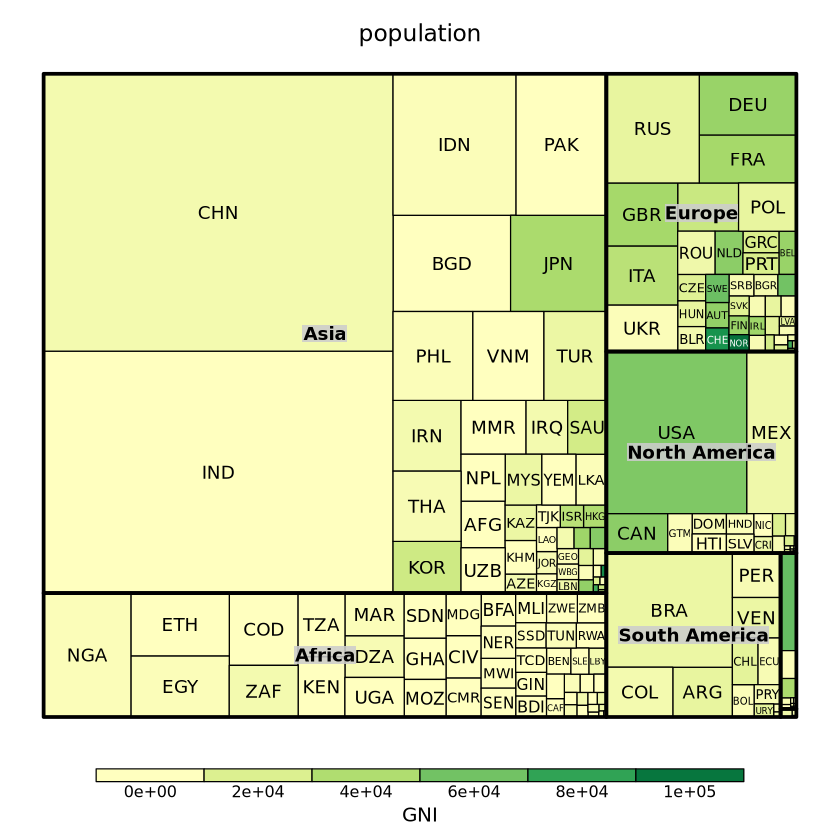

In [16]:
library(treemap) 
data(GNI2014) ; str(GNI2014)
treemap(GNI2014, index = c('continent','iso3'), 
        vSize='population', vColor='GNI', type='value')

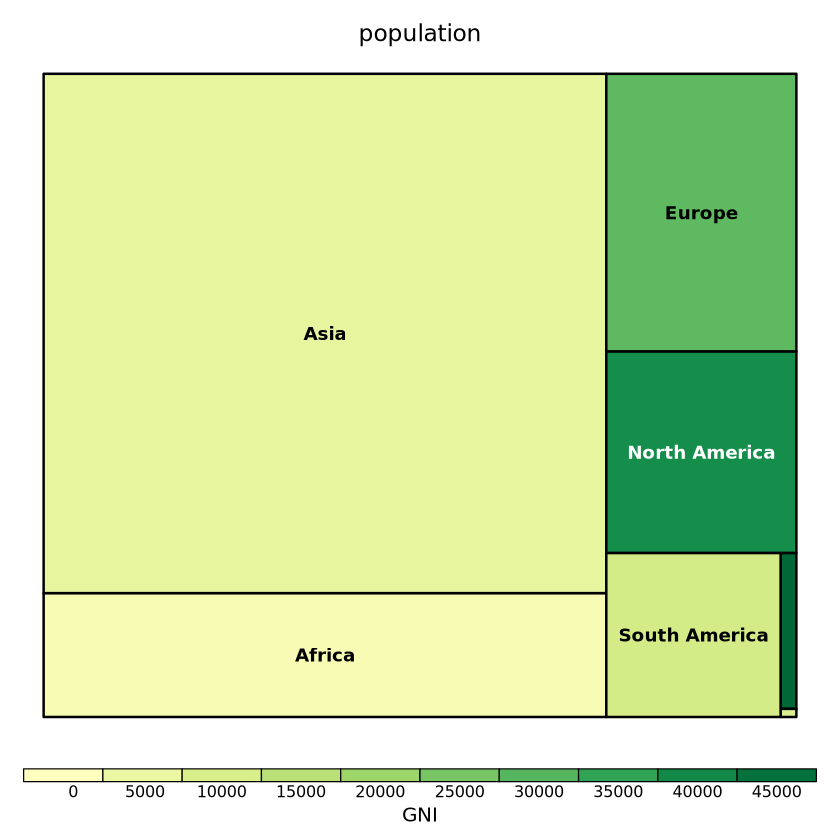

In [17]:
GNI2014$GNI.total = GNI2014$GNI * GNI2014$population
GNI2014.a = aggregate(GNI2014[,4:6], by = list(GNI2014$continent), sum) 
GNI2014.a$GNI = GNI2014.a$GNI.total/GNI2014.a$population 
treemap(GNI2014.a, index = c('Group.1'), vSize='population', 
        vColor='GNI', type='value' )